In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

['09-2017', '975138363413781359345', '07-2017', '16242199484949186112', '08-2017', '181164662377136166221', '06-2018', '1238318290000000000', '06-2017', '182674023323763268000']


,date,number
4,2017-06-01,1.826740e+20
1,2017-07-01,1.624220e+19
2,2017-08-01,1.811647e+20
0,2017-09-01,9.751384e+20
3,2018-06-01,1.238318e+18


,date,number
16,2017-05-01,9.000000e+16
20,2017-06-01,1.000000e+18
14,2017-07-01,1.060149e+22
5,2017-08-01,1.417513e+22
12,2017-09-01,3.628699e+21
7,2017-10-01,2.771208e+21
17,2017-11-01,3.625308e+21
19,2017-12-01,2.004070e+21
15,2018-01-01,2.852623e+21
18,2018-02-01,5.562773e+20


,date,number
3,2017-06-01,9.878410e+18
17,2017-07-01,2.452982e+21
13,2017-08-01,3.016474e+19
10,2017-09-01,1.818667e+20
19,2017-10-01,1.843587e+21


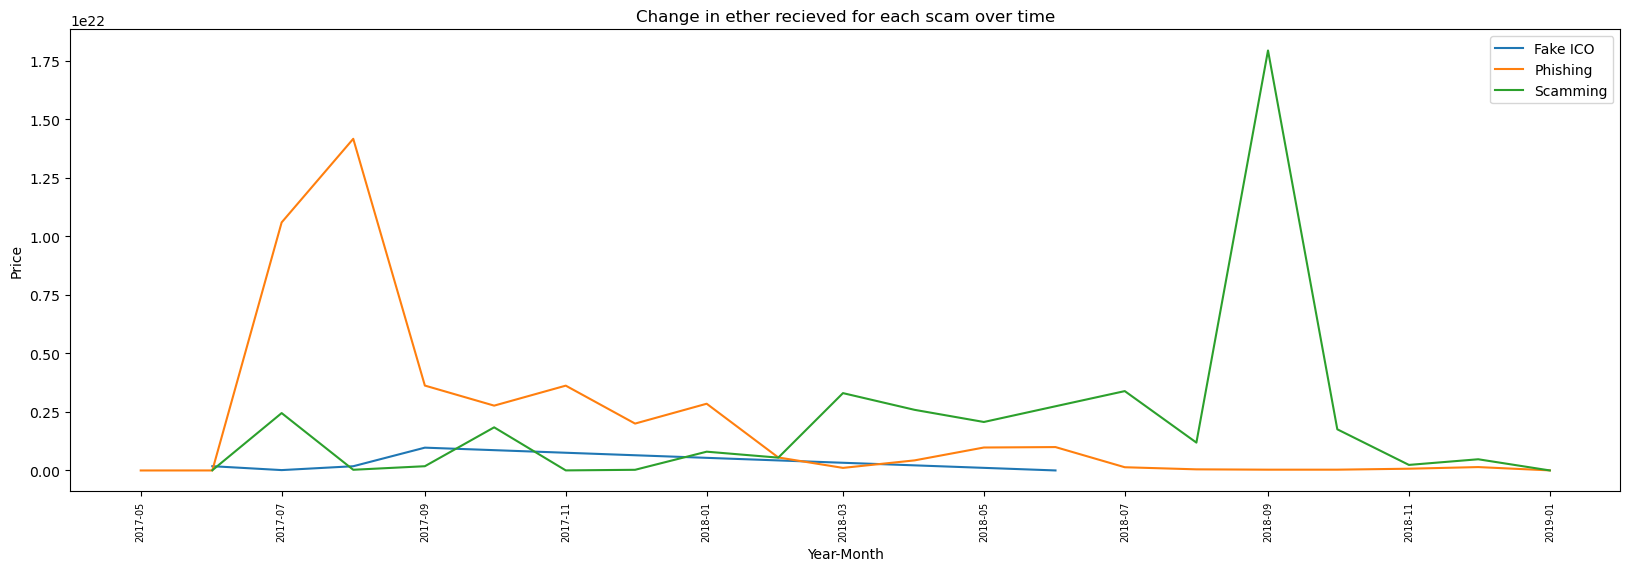

In [2]:
fakeico = []
phishing =[]
scamming = []
with open("q4_scam_graph.txt") as q4:
    mylist = q4.read()
  

mylist = mylist.replace('[', '').replace(']', '').replace('"','').replace(' ','').replace('(','').replace(')','').replace('\'','')

my_list=mylist.split(",")
#print(my_list)
#my_list_new = [val for val in my_list if val != 'Scamming']
#print(my_list_new)
for i in range(len(my_list)):
    if my_list[i] =='FakeICO':
        fakeico.append(my_list[i+1])
        fakeico.append(my_list[i+2])
    elif my_list[i] =='Phishing':
        phishing.append(my_list[i+1])
        phishing.append(my_list[i+2])
    elif my_list[i]=='Scamming':
        scamming.append(my_list[i+1])
        scamming.append(my_list[i+2])
        

print(fakeico)  
#print(phishing)
#print(scamming)

date_fakeico= [dt.strptime(fakeico[i], '%m-%Y') for i in range(len(fakeico)) if i%2==0] 
number_fakeico =[float(fakeico[i]) for i in range(len(fakeico)) if i%2==1]

date_phish= [dt.strptime(phishing[i], '%m-%Y') for i in range(len(phishing)) if i%2==0] 
number_phish =[float(phishing[i]) for i in range(len(phishing)) if i%2==1]

date_scam= [dt.strptime(scamming[i], '%m-%Y') for i in range(len(scamming)) if i%2==0] 
number_scam =[float(scamming[i]) for i in range(len(scamming)) if i%2==1]

#print(date)
#print(number)


df_fakeico = pd.DataFrame(data={'date':date_fakeico,'number':number_fakeico}).sort_values(['date'])
display(df_fakeico.head())

df_phish = pd.DataFrame(data={'date':date_phish,'number':number_phish}).sort_values(['date'])
display(df_phish.head(10))

df_scam = pd.DataFrame(data={'date':date_scam,'number':number_scam}).sort_values(['date'])
display(df_scam.head())

plt.figure(figsize=(20,6))
plt.plot(df_fakeico['date'],df_fakeico['number'],label="Fake ICO")
plt.plot(df_phish['date'],df_phish['number'],label="Phishing")
plt.plot(df_scam['date'],df_scam['number'],label="Scamming")
plt.title("Change in ether recieved for each scam over time")
plt.ylabel("Price")
plt.xlabel("Year-Month")
plt.xticks(rotation = 90, fontsize=7) 
plt.legend()
plt.show()
